# Fare Elasticity  
to understand whether trip_miles or trip_distance is a stronger predictor of base passenger fares

In [1]:
# Libraries
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set float display to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Wranings 
import warnings
warnings.filterwarnings('ignore')

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 3, Finished, Available, Finished)

## Read Data

In [2]:
# Read parquet
df_spark = spark.read.parquet("Files/uploads/fhvhv_tripdata_2025-01.parquet")
df_spark.head()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 4, Finished, Available, Finished)

Row(hvfhs_license_num='HV0003', dispatching_base_num='B03404', originating_base_num='B03404', request_datetime=datetime.datetime(2025, 1, 1, 0, 28, 7), on_scene_datetime=datetime.datetime(2025, 1, 1, 0, 31, 17), pickup_datetime=datetime.datetime(2025, 1, 1, 0, 33, 25), dropoff_datetime=datetime.datetime(2025, 1, 1, 0, 54, 24), PULocationID=148, DOLocationID=211, trip_miles=1.32, trip_time=1259, base_passenger_fare=18.21, tolls=0.0, bcf=0.46, sales_tax=1.5, congestion_surcharge=2.75, airport_fee=0.0, tips=0.0, driver_pay=15.71, shared_request_flag='N', shared_match_flag='N', access_a_ride_flag='N', wav_request_flag='N', wav_match_flag='N', cbd_congestion_fee=0.0)

In [3]:
# type 
type(df_spark)

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 5, Finished, Available, Finished)

pyspark.sql.dataframe.DataFrame

In [4]:
# Columns 
df_spark.columns

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 6, Finished, Available, Finished)

['hvfhs_license_num',
 'dispatching_base_num',
 'originating_base_num',
 'request_datetime',
 'on_scene_datetime',
 'pickup_datetime',
 'dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'trip_miles',
 'trip_time',
 'base_passenger_fare',
 'tolls',
 'bcf',
 'sales_tax',
 'congestion_surcharge',
 'airport_fee',
 'tips',
 'driver_pay',
 'shared_request_flag',
 'shared_match_flag',
 'access_a_ride_flag',
 'wav_request_flag',
 'wav_match_flag',
 'cbd_congestion_fee']

In [5]:
# Shape 
print(f"Shape: ({df_spark.count()}, {len(df_spark.columns)})")

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 7, Finished, Available, Finished)

Shape: (20405666, 25)


### Sample

In [6]:
# Spark df to Pandas
df = df_spark.toPandas().sample(n=500000, random_state=100)    # Sampling 500K rows or 10% of data

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 8, Finished, Available, Finished)

In [7]:
# Shape 
print ("Shape of sampled data is:" , df.shape)

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 9, Finished, Available, Finished)

Shape of sampled data is: (500000, 25)


In [8]:
# Info 
df.info()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 10, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 19677371 to 18450623
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   hvfhs_license_num     500000 non-null  object        
 1   dispatching_base_num  500000 non-null  object        
 2   originating_base_num  376863 non-null  object        
 3   request_datetime      500000 non-null  datetime64[ns]
 4   on_scene_datetime     376863 non-null  datetime64[ns]
 5   pickup_datetime       500000 non-null  datetime64[ns]
 6   dropoff_datetime      500000 non-null  datetime64[ns]
 7   PULocationID          500000 non-null  int32         
 8   DOLocationID          500000 non-null  int32         
 9   trip_miles            500000 non-null  float64       
 10  trip_time             500000 non-null  int64         
 11  base_passenger_fare   500000 non-null  float64       
 12  tolls                 500000 non-null  float64       


## Data Quality

In [9]:
# Trip time in mins and float64
df['trip_time'] = df['trip_time'].astype('float64') / 60

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 11, Finished, Available, Finished)

In [10]:
# Nulls
df.isnull().sum()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 12, Finished, Available, Finished)

hvfhs_license_num            0
dispatching_base_num         0
originating_base_num    123137
request_datetime             0
on_scene_datetime       123137
pickup_datetime              0
dropoff_datetime             0
PULocationID                 0
DOLocationID                 0
trip_miles                   0
trip_time                    0
base_passenger_fare          0
tolls                        0
bcf                          0
sales_tax                    0
congestion_surcharge         0
airport_fee                  0
tips                         0
driver_pay                   0
shared_request_flag          0
shared_match_flag            0
access_a_ride_flag           0
wav_request_flag             0
wav_match_flag               0
cbd_congestion_fee           0
dtype: int64

In [11]:
# Describe 
df.select_dtypes('float64').describe()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 13, Finished, Available, Finished)

,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,cbd_congestion_fee
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00
mean,4.85,18.23,24.29,1.03,0.67,2.04,1.01,0.19,1.04,18.67,0.46
std,5.71,12.49,20.93,3.54,0.60,1.73,1.32,0.66,3.15,15.94,0.69
min,0.00,0.02,-12.26,0.00,0.00,0.00,0.00,0.00,0.00,-38.42,0.00
25%,1.48,9.38,11.64,0.00,0.31,0.97,0.00,0.00,0.00,8.35,0.00
50%,2.83,15.07,18.02,0.00,0.49,1.52,0.00,0.00,0.00,13.94,0.00
75%,6.04,23.58,29.01,0.00,0.79,2.50,2.75,0.00,0.00,23.50,1.50
max,207.08,430.82,826.30,54.83,22.79,59.73,2.75,7.25,130.52,498.54,1.50


### Delete rows with negative values 

In [12]:
# New df, essential columns only 

df1 = df[['pickup_datetime', 'trip_miles', 'trip_time', 'base_passenger_fare']]
df1.head()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 14, Finished, Available, Finished)

,pickup_datetime,trip_miles,trip_time,base_passenger_fare
19677371,2025-01-31 02:51:50,2.89,16.05,15.39
16398052,2025-01-25 21:16:45,1.48,9.45,12.47
18888811,2025-01-29 21:34:05,3.68,14.65,16.73
4063683,2025-01-07 18:28:01,1.93,12.60,11.20
11567530,2025-01-18 21:26:14,3.19,9.58,14.31


In [13]:
# Shape 
df1.shape

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 15, Finished, Available, Finished)

(500000, 4)

In [14]:
# Drop base passenger fares <0 and driver pay <0 
df1 = df1[df1['base_passenger_fare'] >= 0.01]

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 16, Finished, Available, Finished)

In [15]:
# Describe 
df1.select_dtypes('float64').describe()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 17, Finished, Available, Finished)

,trip_miles,trip_time,base_passenger_fare
count,499555.00,499555.00,499555.00
mean,4.85,18.23,24.31
std,5.71,12.49,20.93
min,0.00,0.02,0.11
25%,1.48,9.38,11.65
50%,2.83,15.07,18.04
75%,6.04,23.58,29.02
max,207.08,430.82,826.30


In [16]:
# Shape 
df1.shape

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 18, Finished, Available, Finished)

(499555, 4)

### Trip time vs. Trip Distance 

#### Distributions

In [17]:
np.log1p(df1[['trip_time', 'trip_miles']]).describe()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 19, Finished, Available, Finished)

,trip_time,trip_miles
count,499555.00,499555.00
mean,2.77,1.48
std,0.61,0.71
min,0.02,0.00
25%,2.34,0.91
50%,2.78,1.34
75%,3.20,1.95
max,6.07,5.34


StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 20, Finished, Available, Finished)

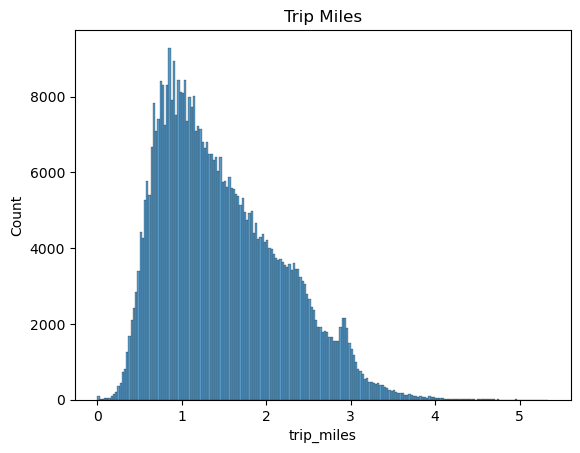

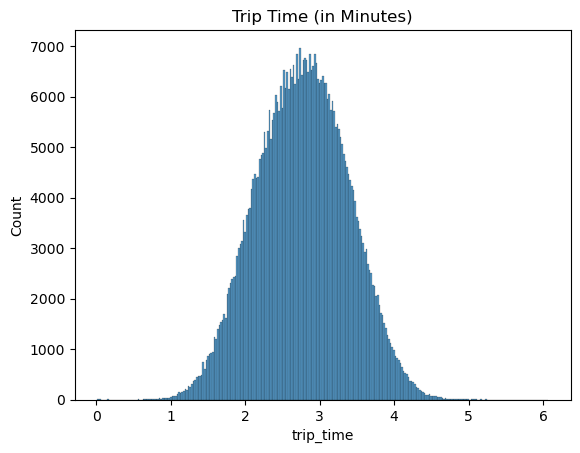

In [18]:
# Histograms
sns.histplot(np.log1p(df1['trip_miles']))
plt.title ('Trip Miles')
plt.show()

sns.histplot(np.log1p(df1['trip_time']))
plt.title ('Trip Time (in Minutes)')
plt.show()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 21, Finished, Available, Finished)

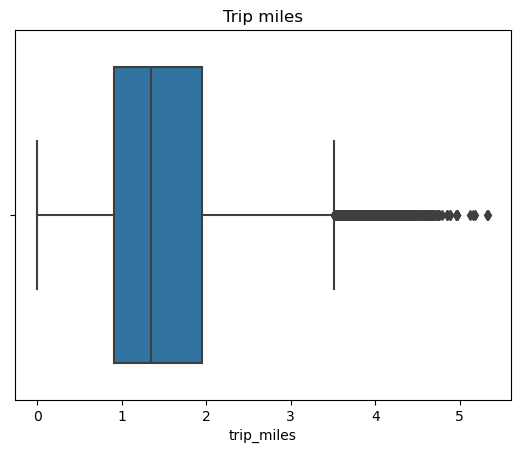

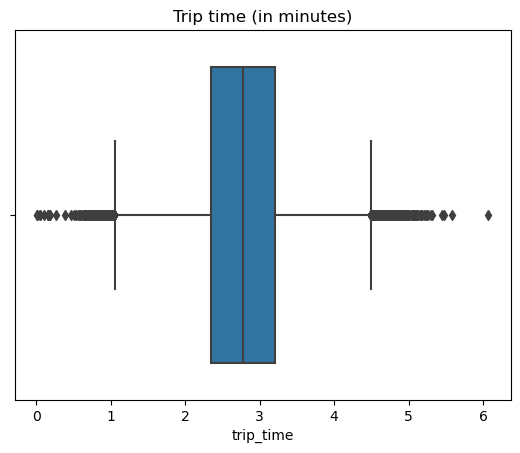

In [19]:
# Boxplots 
sns.boxplot(x=np.log1p(df1['trip_miles']))
plt.title ("Trip miles")
plt.show()

sns.boxplot(x=np.log1p(df1['trip_time']))
plt.title ("Trip time (in minutes)")
plt.show()


StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 22, Finished, Available, Finished)

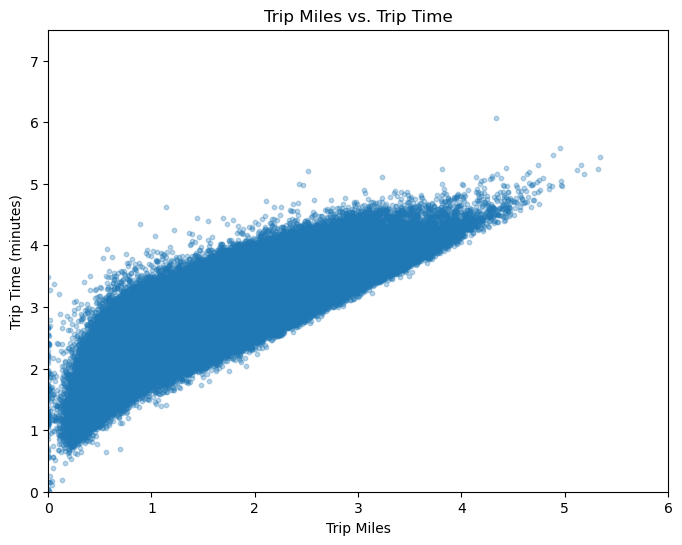

In [20]:
# Trip time vs. Trip Distance

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(df1['trip_miles']), np.log1p(df1['trip_time']), alpha=0.3, s=10)

# Labels and title
plt.xlabel("Trip Miles")
plt.ylabel("Trip Time (minutes)")
plt.title("Trip Miles vs. Trip Time")

# limit axes to filter out extreme outliers
plt.xlim(0, 6)
plt.ylim(0, 7.5)
plt.show()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 23, Finished, Available, Finished)

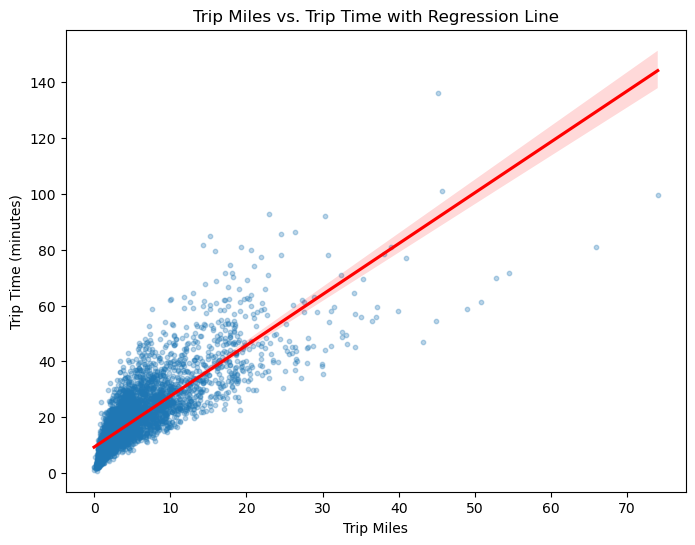

In [21]:
# Regresion line - Trip Miles vs. Trip Time
plt.figure(figsize=(8, 6))
sns.regplot(
    x='trip_miles', 
    y='trip_time', 
    data=df1.sample(5000, random_state=42),  # sample for clarity
    scatter_kws={'alpha':0.3, 's':10}, 
    line_kws={'color':'red'}
)
plt.xlabel("Trip Miles")
plt.ylabel("Trip Time (minutes)")
plt.title("Trip Miles vs. Trip Time with Regression Line")
plt.show()


In [22]:
# Correlations
corr_miles = df1['trip_miles'].corr(df1['base_passenger_fare'])
corr_time  = df1['trip_time'].corr(df1['base_passenger_fare'])
corr_miles_time = df1['trip_miles'].corr(df1['trip_time'])
print("Correlation (Miles vs Fare):", corr_miles)
print("Correlation (Time vs Fare):", corr_time)
print ("Correlation (Miles vs. Time):", corr_miles_time)

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 24, Finished, Available, Finished)

Correlation (Miles vs Fare): 0.85701761254801
Correlation (Time vs Fare): 0.7904773902388711
Correlation (Miles vs. Time): 0.8148396536683036


**Note:** Miles have stronger correlation with Fares than trip time in minutes vs. Fares 

### Quick Regression model

In [23]:
import statsmodels.api as sm

X = df[['trip_miles', 'trip_time']]
y = df['base_passenger_fare']
X = sm.add_constant(X)  # adds intercept

model = sm.OLS(y, X).fit()
print(model.summary())

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 25, Finished, Available, Finished)

                             OLS Regression Results                            
Dep. Variable:     base_passenger_fare   R-squared:                       0.758
Model:                             OLS   Adj. R-squared:                  0.758
Method:                  Least Squares   F-statistic:                 7.845e+05
Date:                 Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                         09:44:31   Log-Likelihood:            -1.8750e+06
No. Observations:               500000   AIC:                         3.750e+06
Df Residuals:                   499997   BIC:                         3.750e+06
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6515      0.027    171.49

#### 1st Model Experiment inferences 

Great! Let’s carefully analyze your **baseline regression** (without log transformations or interactions) and draw clear, interpretable conclusions.

---

### 1️⃣ Regression equation (linear form)

The fitted model is:

[
\text{base_passenger_fare}_i = 4.6515 + 2.3187 \cdot \text{trip_miles}_i + 0.4601 \cdot \text{trip_time}_i + \varepsilon_i
]

* (\varepsilon_i) = error term for observation (i)

---

### 2️⃣ Interpretation of coefficients

| Variable   | Coefficient | Interpretation                                                              |
| ---------- | ----------- | --------------------------------------------------------------------------- |
| const      | 4.6515      | Base fare when trip distance = 0 and trip time = 0 (baseline starting fare) |
| trip_miles | 2.3187      | Each additional mile increases fare by ~$2.32                               |
| trip_time  | 0.4601      | Each additional minute increases fare by ~$0.46                             |

* All coefficients are highly significant (p < 0.001)
* F-statistic is extremely high → the model is statistically significant

---

### 3️⃣ Model fit

* R² = 0.758 → 75.8% of the variation in fare is explained by distance and time.
* Durbin-Watson ≈ 1.995 → residuals have minimal autocorrelation
* Omnibus / JB tests indicate residuals are **not perfectly normally distributed**, but with this many observations, minor deviations are expected.

---

### 4️⃣ Key insights

1. **Distance is the dominant factor**:

   * Coefficient for miles (2.3187) is much larger than for time (0.4601).

2. **Time also matters**:

   * Each minute adds ~$0.46, so duration contributes meaningfully, especially for longer trips.

3. **Baseline fare**:

   * Even a zero-mile, zero-minute trip is estimated at ~$4.65, reflecting a starting fee.

4. **Comparison to log-transformed model**:

   * This simple linear model captures the overall trend but **does not account for elasticity effects**: the impact of distance and time does not scale with trip length.
   * Interactions and log-transformations in your later models allow the slope (sensitivity to miles/time) to **change for long vs short trips**, which this baseline ignores.

---

✅ **Practical takeaway**:

This is a good first-pass “baseline” model:

* Explains a large portion of fare variation (R² ≈ 0.76)
* Easy to interpret per-mile and per-minute costs
* But it **cannot capture nonlinear effects** (e.g., long trips being more sensitive to distance)

---


### Log Regression

In [24]:
import statsmodels.api as sm

# Keep only positive values to avoid log issues
df_reg = df1[(df1['base_passenger_fare'] > 0) &
            (df1['trip_miles'] > 0) &
            (df1['trip_time'] > 0)].copy()


# natural logs
df_reg['log_fare']  = np.log(df_reg['base_passenger_fare'])
df_reg['log_miles'] = np.log(df_reg['trip_miles'])
df_reg['log_time']  = np.log(df_reg['trip_time'])

# log-log regression
X = df_reg[['log_miles', 'log_time']]
X = sm.add_constant(X)  # adds intercept
y = df_reg['log_fare']

model = sm.OLS(y, X).fit()
print(model.summary())

# Interpret
# Coefficients are elasticities
elasticity_miles = model.params['log_miles']
elasticity_time  = model.params['log_time']

print(f"Elasticity of fare w.r.t miles: {elasticity_miles:.3f}")
print(f"Elasticity of fare w.r.t time: {elasticity_time:.3f}")


StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 26, Finished, Available, Finished)

                            OLS Regression Results                            
Dep. Variable:               log_fare   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 7.867e+05
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:44:39   Log-Likelihood:            -1.3055e+05
No. Observations:              499488   AIC:                         2.611e+05
Df Residuals:                  499485   BIC:                         2.611e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5595      0.003    528.766      0.0

#### 2nd Experiment Inferences

🔍 **Model Overview**

- Dependent variable: log_fare
- Predictors: log_miles, log_time
- Number of observations: 499,488
- Model type: Log-log OLS regression
- R²: 0.759
- Adjusted R²: 0.759

✅ **Interpretation**:
About 75.9% of the variation in log(fare) is explained by just two predictors — trip distance (log_miles) and trip duration (log_time).

🧮 **Elasticities**:

- Elasticity of fare w.r.t miles: 0.342
- Elasticity of fare w.r.t time: 0.379
→ Fares are slightly more sensitive to time than distance, which aligns with how real-world taxi pricing often includes waiting time and traffic effects.

⚖️ **Statistical Significance**

- All predictors are highly significant (p < 0.001).
- This means both trip distance and time have a strong, reliable effect on fare.

🚖 **Key Takeaway**

Fares in this dataset scale elastically with both trip distance and time.
A 1% longer trip increases fares by about 0.34%, while a 1% longer duration increases fares by 0.38%.
The model provides a strong, interpretable, and statistically robust foundation for fare prediction and policy analysis.


StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 27, Finished, Available, Finished)

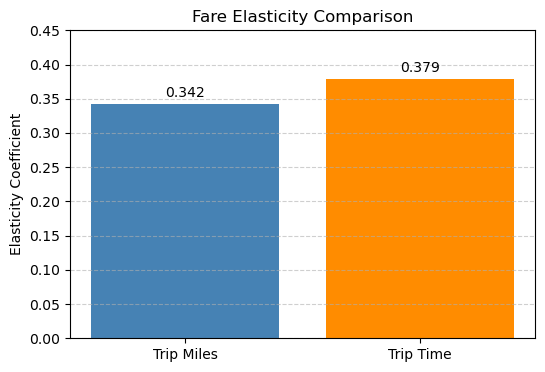

In [25]:
# Plot model params
b_miles = model.params['log_miles']
b_time = model.params['log_time']

# Plots 
elasticities = {'Trip Miles': b_miles, 'Trip Time': b_time}

plt.figure(figsize=(6,4))
plt.bar(elasticities.keys(), elasticities.values(), color=['steelblue', 'darkorange'])
plt.title('Fare Elasticity Comparison')
plt.ylabel('Elasticity Coefficient')
plt.ylim(0, 0.45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, val in enumerate(elasticities.values()):
    plt.text(i, val + 0.01, f"{val:.3f}", ha='center', fontsize=10)
plt.show()

### Log-Log Regression by distance segments (bins)

In [26]:
# Data Cleaning
# Keep valid trips (positive values only)
df1_reg = df1[(df1['base_passenger_fare'] > 0) & (df1['trip_miles'] > 0.1) &
            (df1['trip_time'] > 0.1)].copy()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 28, Finished, Available, Finished)

In [27]:
# Describe 
df1_reg[['base_passenger_fare', 'trip_miles', 'trip_time']].describe()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 29, Finished, Available, Finished)

,base_passenger_fare,trip_miles,trip_time
count,499400.00,499400.00,499400.00
mean,24.31,4.85,18.24
std,20.93,5.71,12.49
min,0.11,0.11,0.20
25%,11.65,1.48,9.38
50%,18.04,2.83,15.07
75%,29.03,6.04,23.58
max,826.30,207.08,430.82


In [28]:
# Shape 
df1_reg.shape

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 30, Finished, Available, Finished)

(499400, 4)

In [29]:
# Define Distance Bins, add bins to df
bins = [0, 2, 5, 10, 20, 50, 600]   # adjust as needed
labels = ["0-2 mi", "2-5 mi", "5-10 mi", "10-20 mi", "20-50 mi", "50+ mi"]
df1_reg['distance_bin'] = pd.cut(df1_reg['trip_miles'], bins=bins, labels=labels, right=False)

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 31, Finished, Available, Finished)

In [30]:
# bins value counts
df1_reg.distance_bin.value_counts()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 32, Finished, Available, Finished)

distance_bin
0-2 mi      183213
2-5 mi      163212
5-10 mi      91401
10-20 mi     50187
20-50 mi     10810
50+ mi         577
Name: count, dtype: int64

In [31]:
# Log-Log Regression in Each Bin 
elasticities = []

for bin_label in labels:
    subset = df1_reg[df1_reg['distance_bin'] == bin_label]
    if len(subset) < 90:  # skip bins with very few trips
        continue
    
    # log-transform safely (no 0s)
    subset['log_fare']  = np.log(subset['base_passenger_fare'])
    subset['log_miles'] = np.log(subset['trip_miles'])
    subset['log_time']  = np.log(subset['trip_time'])
    
    X = sm.add_constant(subset[['log_miles', 'log_time']])
    y = subset['log_fare']
    model = sm.OLS(y, X).fit()
    
    elasticity_miles = model.params['log_miles']
    elasticity_time  = model.params['log_time']
    
    elasticities.append({
        'bin': bin_label,
        'elasticity_miles': elasticity_miles,
        'elasticity_time': elasticity_time
    })

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 33, Finished, Available, Finished)

In [32]:
# Coefficients
print ("Elasticity miles coefficient:", elasticity_miles)
print ("Elasticity time coefficient:", elasticity_time)

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 34, Finished, Available, Finished)

Elasticity miles coefficient: 0.8675760199478885
Elasticity time coefficient: 0.018855315979063245


In [33]:
# last model run on what bin?
print(f"\n=== Distance Bin: {bin_label} ===")
print(model.summary().tables[1])  # prints just the coefficients table

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 35, Finished, Available, Finished)


=== Distance Bin: 50+ mi ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5668      0.205      7.653      0.000       1.165       1.969
log_miles      0.8676      0.065     13.263      0.000       0.739       0.996
log_time       0.0189      0.059      0.320      0.749      -0.097       0.135


In [34]:
# Summary for distance bin 50+ mi
print (model.summary())

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 36, Finished, Available, Finished)

                            OLS Regression Results                            
Dep. Variable:               log_fare   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           2.98e-62
Time:                        09:45:15   Log-Likelihood:                -57.091
No. Observations:                 577   AIC:                             120.2
Df Residuals:                     574   BIC:                             133.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5668      0.205      7.653      0.0

**Observations from model summary**: 

- The loop runs the regression once per distance bin (one model per bin).
- Each iteration overwrites the model variable.
- So, when the loop ends, the model object only contains the results from the last successful bin in the loop.

**Conclusion**: 
- The model.summary() printed is only for the last distance bin 50+ mi that passed the len(subset) >= 90 test or very long trips where log_time is insignificant



In [35]:
# Convert to df
elasticities_df = pd.DataFrame(elasticities)
elasticities_df

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 37, Finished, Available, Finished)

,bin,elasticity_miles,elasticity_time
0,0-2 mi,0.04,0.41
1,2-5 mi,0.26,0.51
2,5-10 mi,0.47,0.43
3,10-20 mi,0.69,0.34
4,20-50 mi,0.87,0.22
5,50+ mi,0.87,0.02


In [36]:
# Pivot distance bins
df1_reg.pivot_table(index='distance_bin', values='base_passenger_fare', aggfunc=['mean', 'count'])
pivot_df1_reg = df1_reg.pivot_table(index='distance_bin', values='base_passenger_fare', 
                        aggfunc=['mean', 'count']).reset_index()
pivot_df1_reg.columns = ['distance_bin', 'mean_fare', 'count']
pivot_df1_reg                        

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 38, Finished, Available, Finished)

,distance_bin,mean_fare,count
0,0-2 mi,11.98,183213
1,2-5 mi,20.29,163212
2,5-10 mi,31.54,91401
3,10-20 mi,52.36,50187
4,20-50 mi,93.22,10810
5,50+ mi,204.61,577


In [37]:
# Concat with elasticities 
pd.concat ([elasticities_df, pivot_df1_reg.iloc[:, 1:]], axis=1)

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 39, Finished, Available, Finished)

,bin,elasticity_miles,elasticity_time,mean_fare,count
0,0-2 mi,0.04,0.41,11.98,183213
1,2-5 mi,0.26,0.51,20.29,163212
2,5-10 mi,0.47,0.43,31.54,91401
3,10-20 mi,0.69,0.34,52.36,50187
4,20-50 mi,0.87,0.22,93.22,10810
5,50+ mi,0.87,0.02,204.61,577


StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 40, Finished, Available, Finished)

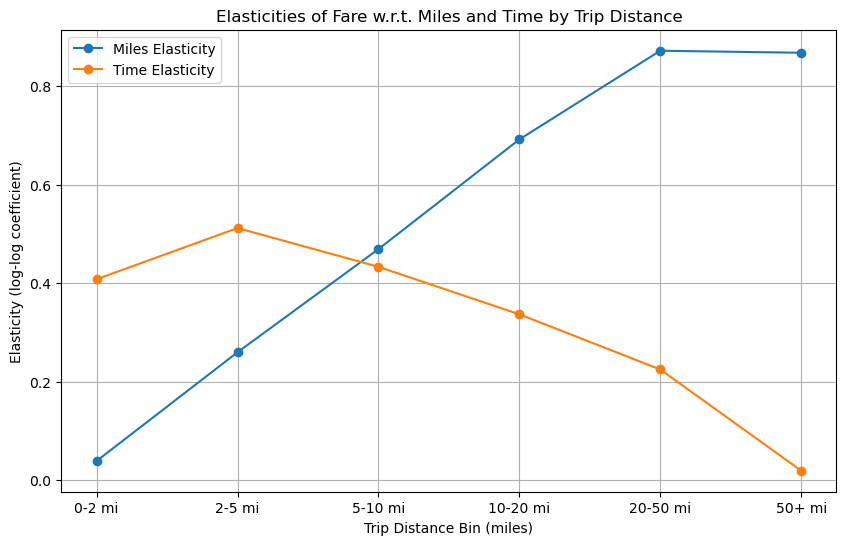

In [38]:
# Plot Elasticities
plt.figure(figsize=(10,6))
plt.plot(elasticities_df['bin'], elasticities_df['elasticity_miles'], marker='o', label="Miles Elasticity")
plt.plot(elasticities_df['bin'], elasticities_df['elasticity_time'], marker='o', label="Time Elasticity")

plt.title("Elasticities of Fare w.r.t. Miles and Time by Trip Distance")
plt.xlabel("Trip Distance Bin (miles)")
plt.ylabel("Elasticity (log-log coefficient)")
plt.legend()
plt.grid(True)
plt.show()

#### Inferences

🚖 **Context**

We regressed log(fare) on log(miles) and log(time) within each distance band, producing separate elasticities.This approach captures non-linearities in fare behavior that a single global model might hide.

📊 **Summary of Elasticities by Distance Bin**

| Distance Bin | Elasticity (Miles) | Elasticity (Time) | Dominant Driver                      |
| ------------ | ------------------ | ----------------- | ------------------------------------ |
| 0–2 mi       | 0.04               | 0.41              | ⏱️ Time dominates                    |
| 2–5 mi       | 0.26               | 0.51              | ⏱️ Time dominates                    |
| 5–10 mi      | 0.47               | 0.43              | ⚖️ Balanced                          |
| 10–20 mi     | 0.69               | 0.34              | 📏 Distance dominates                |
| 20–50 mi     | 0.87               | 0.22              | 📏 Distance dominates strongly       |
| 50+ mi       | 0.87               | 0.02              | 📏 Distance overwhelmingly dominates |


🧠 **Core Insights**

A. Time Sensitivity Falls as Distance Increases

In short trips (0–5 mi), fares are highly time-elastic — elasticity ≈ 0.4–0.5.
→ Passengers pay more due to waiting time, stop-go traffic, or pickup delays, not so much distance.

By longer distances (20+ mi), time elasticity drops sharply — approaching zero for 50+ mi trips.
→ Once the trip is mainly highway or continuous driving, duration barely affects fares.

B. Distance Elasticity Rises with Distance

For short trips, distance elasticity starts near 0.04 — essentially flat fares with respect to distance.
→ Base fare and time dominate here.

As trips get longer, elasticity of fare w.r.t. distance climbs steadily to 0.87.
→ Fare increases almost proportionally with distance on long-haul trips.

C. Shift in Fare Composition

There’s a clear inflection in fare dynamics:

Below 5 mi: Time-based pricing dominates (urban, congested zones).

5–10 mi: Transitional zone — distance and time contribute roughly equally.

Beyond 10 mi: Distance-based pricing dominates (highway/intercity travel).

This suggests the fare structure transitions from time-driven to distance-driven pricing as trip length grows.


#### Hypothesis Testing

Formal Hypotheses

##### Overall elasticities differ

𝐻0: 𝛽miles = 𝛽time

𝐻1 : 𝛽miles ≠ 𝛽time



In [39]:
# Wald test: are log_miles and log_time coefficients equal?
wald_test = model.wald_test("log_miles = log_time")
print(wald_test)

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 41, Finished, Available, Finished)

<F test: F=array([[54.51322068]]), p=5.458458813656208e-13, df_denom=574, df_num=1>


**Inference:**

F = 54.51322
p = 5.458458813656208e-13
df_num = 1
df_denom ≈ 574
Null hypothesis (H₀): β_miles = β_time

Alternative (H₁): β_miles ≠ β_time

F-statistic = 54.513 → large, meaning the coefficients are very different.

p-value ≈ 5e-13 → essentially 0, far below any conventional significance level (0.05, 0.01, 0.001).

✅ Conclusion: Reject H₀. The elasticity of fare with respect to miles is not equal to the elasticity with respect to time in this bin. One clearly dominates.

### Log-Log Regression - Short vs. Long Trips

##### Do Elasticities differ by trip length (heterogeneity)?

𝐻0 : 𝛽milesshort = 𝛽mileslong

𝐻1 : 𝛽milesshort ≠ 𝛽mileslong

Short trips (0-2 miles and 2-5 miles) vs. Long trips (10-20 miles, 20-50 miles)

In [40]:
# Heads
df1_reg.head()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 42, Finished, Available, Finished)

,pickup_datetime,trip_miles,trip_time,base_passenger_fare,distance_bin
19677371,2025-01-31 02:51:50,2.89,16.05,15.39,2-5 mi
16398052,2025-01-25 21:16:45,1.48,9.45,12.47,0-2 mi
18888811,2025-01-29 21:34:05,3.68,14.65,16.73,2-5 mi
4063683,2025-01-07 18:28:01,1.93,12.60,11.20,0-2 mi
11567530,2025-01-18 21:26:14,3.19,9.58,14.31,2-5 mi


In [41]:
# Subset short and long bins
short_bin = df1_reg[df1_reg['distance_bin'].isin(["0-2 mi", "2-5 mi"])].copy()
long_bin  = df1_reg[df1_reg['distance_bin'].isin(["10-20 mi", "20-50 mi"])].copy()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 43, Finished, Available, Finished)

In [42]:
# Combine bins, add log-transformed fares, miles and trip times
df1_test = pd.concat([short_bin, long_bin])
df1_test['log_fare']  = np.log(df1_test['base_passenger_fare'])
df1_test['log_miles'] = np.log(df1_test['trip_miles'])
df1_test['log_time']  = np.log(df1_test['trip_time'])

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 44, Finished, Available, Finished)

In [43]:
# dummy for long trips
df1_test['long_dummy'] = (df1_test['distance_bin'].isin(["10-20 mi", "20-50 mi"])).astype(int)

# Add interaction terms
df1_test['log_miles_long'] = df1_test['log_miles'] * df1_test['long_dummy']
df1_test['log_time_long']  = df1_test['log_time'] * df1_test['long_dummy']

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 45, Finished, Available, Finished)

In [44]:
# heads 
df1_test[df1_test['long_dummy'] > 0].head()

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 46, Finished, Available, Finished)

,pickup_datetime,trip_miles,trip_time,base_passenger_fare,distance_bin,log_fare,log_miles,log_time,long_dummy,log_miles_long,log_time_long
4197290,2025-01-07 22:20:08,13.75,30.45,47.65,10-20 mi,3.86,2.62,3.42,1,2.62,3.42
11073905,2025-01-18 07:02:32,18.74,37.68,73.19,10-20 mi,4.29,2.93,3.63,1,2.93,3.63
8216704,2025-01-13 22:38:25,26.77,34.37,93.28,20-50 mi,4.54,3.29,3.54,1,3.29,3.54
10791518,2025-01-17 20:41:48,13.52,33.43,35.00,10-20 mi,3.56,2.60,3.51,1,2.60,3.51
10639576,2025-01-17 17:07:26,12.64,42.15,37.49,10-20 mi,3.62,2.54,3.74,1,2.54,3.74


In [45]:
# Run pooled regression with interactions
X = sm.add_constant(df1_test[['log_miles', 'log_time', 'long_dummy', 
                    'log_miles_long', 'log_time_long']])
y = df1_test['log_fare']
model = sm.OLS(y, X).fit()

print(model.summary())

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 47, Finished, Available, Finished)

                            OLS Regression Results                            
Dep. Variable:               log_fare   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 2.980e+05
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:45:26   Log-Likelihood:                -85813.
No. Observations:              407422   AIC:                         1.716e+05
Df Residuals:                  407416   BIC:                         1.717e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4991      0.003    451.

#### Inferences

🚖 **1. 3rd Experimental Setup**

* We combined two categories of trips:

  * **Short trips:** 0–2 mi and 2–5 mi
  * **Long trips:** 10–20 mi and 20–50 mi
* Added a dummy variable `long_dummy = 1` for long trips.
* Introduced interaction terms:

  * `log_miles_long = log_miles * long_dummy`
  * `log_time_long  = log_time * long_dummy`
* This lets the **elasticities** (coefficients) differ between short and long trips within a single regression model.

Mathematically, your model is:
[
\log(\text{fare}) = \beta_0 + \beta_1 \log(\text{miles}) + \beta_2 \log(\text{time}) +
\beta_3 D_{\text{long}} + \beta_4 (\log(\text{miles}) \times D_{\text{long}}) +
\beta_5 (\log(\text{time}) \times D_{\text{long}}) + \epsilon
]

---

📊 **2. Model Summary**

| Metric                    | Value              | Interpretation                                                                        |
| ------------------------- | ------------------ | ------------------------------------------------------------------------------------- |
| **R²**                    | 0.785              | The model explains **78.5%** of variation in log(fare) — excellent explanatory power. |
| **Observations**          | 407,422            | Large, stable estimation base.                                                        |
| **F-statistic (p<0.001)** | Highly significant | The model overall fits extremely well.                                                |

✅ **All coefficients are statistically significant (p < 0.001)**.

---

🧮 **3. Coefficients and Derived Elasticities**

| Term               | Coefficient | Interpretation                                                                                |
| ------------------ | ----------- | --------------------------------------------------------------------------------------------- |
| **const**          | 1.499       | Baseline log-fare level for short trips.                                                      |
| **log_miles**      | 0.179       | Distance elasticity for short trips.                                                          |
| **log_time**       | 0.440       | Time elasticity for short trips.                                                              |
| **long_dummy**     | -0.608      | Long trips have a **lower base fare level** (in log terms) once other effects are controlled. |
| **log_miles_long** | +0.533      | Additional elasticity for long trips due to distance.                                         |
| **log_time_long**  | -0.120      | Reduction in time elasticity for long trips.                                                  |

---

✳️ **Elasticities by Trip Type**

| Trip Type                 | Distance Elasticity       | Time Elasticity           | Interpretation                                      |
| ------------------------- | ------------------------- | ------------------------- | --------------------------------------------------- |
| **Short Trips (0–5 mi)**  | **0.179**                 | **0.440**                 | Time-driven pricing (waiting/traffic effects)       |
| **Long Trips (10–50 mi)** | **0.179 + 0.533 = 0.712** | **0.440 − 0.120 = 0.320** | Distance-driven pricing (highway/intercity pattern) |

---

🧠 **4. Core Insights**

**A. Fare Elasticities Shift Significantly Between Short & Long Trips**

* **Distance elasticity jumps** from 0.18 → **0.71**.
  → Long trips’ fares scale much more strongly with miles.
* **Time elasticity drops** from 0.44 → **0.32**.
  → Time effects weaken, consistent with faster, less interrupted driving.

**B. Strong Confirmation of Nonlinearity**

The interaction terms (log_miles_long, log_time_long) are both **highly significant**, statistically validating that:

> The relationship between fare, distance, and time is **structurally different** across trip lengths.

This formally confirms what your previous bin-by-bin regression suggested — short and long trips operate under **different fare dynamics**.

**C. Lower Intercept for Long Trips**

* The negative `long_dummy` (–0.6076) means that, holding distance and time constant, long trips start from a **lower base fare level**.
* That aligns with pricing practices where **base/minimum fares matter more for short rides**, while long rides derive fare primarily from distance.

---

🧩 **5. Practical Implications**

| Area                        | Implication                                                                                                              |
| --------------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **Pricing strategy**        | Suggests **dual fare regimes**: time-dominant for short trips, distance-dominant for long trips.                         |
| **Modeling and prediction** | Including interaction terms significantly improves accuracy (R² = 0.785 vs 0.759 before).                                |
| **Policy insight**          | Regulators can optimize fare rules knowing fare sensitivity changes with trip length.                                    |
| **Operations**              | Time-based costs (like idling, traffic) matter for city trips; distance-based costs dominate for intercity/airport runs. |

---

🏁 **6. Key Takeaway**

> This pooled regression with interaction terms **quantifies and validates** the shift from **time-driven** to **distance-driven** fare dynamics as trip length increases.
>
> * Short trips: **Elasticity (miles=0.18, time=0.44)** → dominated by time.
> * Long trips: **Elasticity (miles=0.71, time=0.32)** → dominated by distance.
> * Overall model fit (R² = 0.785) confirms that allowing these nonlinear effects yields a **more realistic, high-performing model**.

---

Visual Summary 

image.png


##### Wald Test: Short vs. Long Test

In [46]:
# Null: log_miles effect is same in short and long trips
print(model.wald_test("log_miles_long = 0"))

# Null: log_time effect is same in short and long trips
print(model.wald_test("log_time_long = 0"))

# Joint test: both differ
print(model.wald_test("log_miles_long = 0, log_time_long = 0"))


StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 48, Finished, Available, Finished)

<F test: F=array([[12823.93534393]]), p=0.0, df_denom=4.07e+05, df_num=1>
<F test: F=array([[650.69938079]]), p=2.0420758064387874e-143, df_denom=4.07e+05, df_num=1>
<F test: F=array([[7721.96113191]]), p=0.0, df_denom=4.07e+05, df_num=2>


**Results:**

Test for log_miles_long = 0

F = 12,824, p = 0.0


→ Reject H₀.
→ Miles elasticity is significantly different between short and long trips.

Test for log_time_long = 0

F = 651, p = 2e-143


→ Reject H₀.
→ Time elasticity is significantly different between short and long trips.

Joint test (both coefficients differ)

F = 7,721, p = 0.0


→ Reject H₀.
→ Both elasticities differ simultaneously between short and long trips.

### Log-Log Regression (> 5 miles distance cut-off)

##### Do we have a > 5 mile tipping point

𝐻0 : No distance range where miles elasticity > time elasticity.

𝐻1 : There exists a cut-off where miles elasticity overtakes time elasticity.

→ Test: fit interaction model

ln(Fare) = 𝛼 + 𝛽1 ln(Miles) + 𝛽2 ln(Time) + 𝛽3𝐼(Miles > 5) ⋅ ln(Miles) + 𝜖

If 𝛽3 is significant, it means the effect of miles changes above 5 miles.

In [47]:
# Drop long_dummy 
df1_test.drop('long_dummy', axis=1, inplace=True)

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 49, Finished, Available, Finished)

In [48]:
# recreate dummy for trips longer than 5 miles
df1_test['long_dummy'] = (df1_test['trip_miles'] > 5).astype(int)       # For 5 miles cut-off

# Interaction term: long trips × log_miles
df1_test['log_miles_interact'] = df1_test['log_miles'] * df1_test['long_dummy']
df1_test['log_time_interact'] = df1_test['log_time'] * df1_test['long_dummy']

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 50, Finished, Available, Finished)

In [49]:
# Fit interaction model 

X = sm.add_constant(df1_test[['log_miles', 'log_time', 'long_dummy',
                    'log_miles_interact', 'log_time_interact']])
y = df1_test['log_fare']

model = sm.OLS(y, X).fit()
print(model.summary())

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 51, Finished, Available, Finished)

                            OLS Regression Results                            
Dep. Variable:               log_fare   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                 2.980e+05
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:47:57   Log-Likelihood:                -85813.
No. Observations:              407422   AIC:                         1.716e+05
Df Residuals:                  407416   BIC:                         1.717e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4991      0

---

#### 1️⃣ Model summary (key points)

| Variable           | Coef    | Interpretation                              |
| ------------------ | ------- | ------------------------------------------- |
| const              | 1.4991  | Base log-fare for short trips (≤5 miles)    |
| log_miles          | 0.1788  | Miles elasticity for short trips            |
| log_time           | 0.4397  | Time elasticity for short trips             |
| long_dummy         | -0.6076 | Intercept adjustment for long trips (>5 mi) |
| log_miles_interact | 0.5334  | Additional miles elasticity for long trips  |
| log_time_interact  | -0.1200 | Additional time elasticity for long trips   |

* R² = 0.785 → Model explains ~78.5% of variation in log-fare
* All coefficients are highly significant (p < 0.001)

---

#### 2️⃣ Interpretation of coefficients

##### a) Short trips (≤5 miles)

[
\text{log_fare} = 1.4991 + 0.1788 \cdot \log(\text{miles}) + 0.4397 \cdot \log(\text{time})
]

* Miles elasticity ≈ 0.179 → 1% increase in trip distance increases fare by ~0.179%
* Time elasticity ≈ 0.440 → 1% increase in trip time increases fare by ~0.44%
* Base fare (intercept) = 1.4991

##### b) Long trips (>5 miles)

[
\text{log_fare} = (1.4991 - 0.6076) + (0.1788 + 0.5334) \cdot \log(\text{miles}) + (0.4397 - 0.1200) \cdot \log(\text{time})
]

* Intercept = 0.8915 → Base fare is lower for long trips **if distance and time are held constant**, but this is offset by the higher slope for miles
* Miles elasticity ≈ 0.712 → Distance has a much stronger effect on fare for long trips
* Time elasticity ≈ 0.320 → Duration has a smaller effect for long trips compared to short trips

---

#### 3️⃣ Key inferences

1. **Effect of trip length (miles)**:

   * Elasticity rises sharply for trips longer than 5 miles (0.179 → 0.712)
   * Distance dominates fare pricing for long trips

2. **Effect of trip time**:

   * Time elasticity is slightly lower for long trips (0.440 → 0.320)
   * Duration matters less for long trips compared to short trips

3. **Baseline fare shift (intercept)**:

   * Negative long-trip dummy (-0.608) means that if a long trip had average distance & time, it would start slightly lower than short trips, but the higher distance elasticity quickly dominates as trip distance increases

4. **Overall model fit**:

   * R² = 0.785 → Good explanatory power
   * Significant interactions indicate the effect of miles and time is **not uniform across all trips**

5. **Practical implication**:

   * Fare pricing is highly sensitive to distance for long trips, while short trips are more sensitive to time.
   * Any pricing, forecasting, or regulatory analysis should **model trips separately for short vs long trips**, or use interactions as done here.

---


In [50]:
# Wald test for significance of interaction term
wald_test = model.wald_test("log_miles_interact = 0")
print(wald_test)

StatementMeta(, a3a0ee33-de57-4750-8878-ad040ec8de72, 52, Finished, Available, Finished)

<F test: F=array([[12823.93534393]]), p=0.0, df_denom=4.07e+05, df_num=1>


**Inferences:** 

Null hypothesis (H₀): The effect of miles on fare does not change above 5 miles.

Alternative (H₁): The effect of miles on fare changes above 5 miles.

✅ With p ≈ 0.0 (essentially < 0.001), you reject H₀.
👉 This means: the relationship between fare and distance is structurally different once trips are longer than 5 miles.

### Exporting Data

In [ ]:
# Tipping points to csv 
pd.DataFrame({"cutoffs": cutoffs, "f_stats": f_stats}).to_csv\
                ("/lakehouse/default/Files/fare_elasticity/tipping_point.csv", index=False)

StatementMeta(, fce92011-c972-49c7-bbb7-ad5be39656f6, -1, Cancelled, , Cancelled)

In [ ]:
# Export fare elasticity
pd.concat ([elasticities_df, pivot_df1_reg], axis=1).to_csv(
            "/lakehouse/default/Files/fare_elasticity/fare_elasticity.csv")

StatementMeta(, fce92011-c972-49c7-bbb7-ad5be39656f6, -1, Cancelled, , Cancelled)

In [ ]:
# df1 -> delta lake 
spark.createDataFrame(df1).write.format("delta").mode("overwrite")\
                        .option("overwriteSchema", "true")\
                        .saveAsTable("fare_elast_df1")

StatementMeta(, fce92011-c972-49c7-bbb7-ad5be39656f6, -1, Cancelled, , Cancelled)

In [ ]:
# df1_re -> delta lake 
spark.createDataFrame(df1_reg).write.format("delta").mode("overwrite")\
                        .option("overwriteSchema", "true")\
                        .saveAsTable("fare_elast_df1_reg")

StatementMeta(, fce92011-c972-49c7-bbb7-ad5be39656f6, -1, Cancelled, , Cancelled)

In [ ]:
df1.shape

StatementMeta(, fce92011-c972-49c7-bbb7-ad5be39656f6, -1, Cancelled, , Cancelled)

In [ ]:
# excel df 
df_excel = df.toPandas().sample(n=10000, random_state=100)          # Sampling 10K rows for excel

StatementMeta(, fce92011-c972-49c7-bbb7-ad5be39656f6, -1, Cancelled, , Cancelled)

In [ ]:
# Shape 
df_excel.shape

StatementMeta(, fce92011-c972-49c7-bbb7-ad5be39656f6, -1, Cancelled, , Cancelled)

In [ ]:
# Export excel df to delta lake 
spark.createDataFrame(df_excel).write.format("delta").mode("overwrite")\
                        .option("overwriteSchema", "true")\
                        .saveAsTable("fare_elast_df_excel")

StatementMeta(, fce92011-c972-49c7-bbb7-ad5be39656f6, -1, Cancelled, , Cancelled)